In [2]:
import json
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import numpy as np
import keras.backend as K
import cv2
import lime 

In [3]:
import tensorflow as tf
import time

In [4]:


import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)


Notebook run using keras: 2.12.0


In [74]:
# Charger le modèle
model = load_model("/kaggle/input/bootstrap-data/ModelSjogrenn(2).h5")



In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 502, 502, 32)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 251, 251, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 32)      50208     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 32)      50208     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 58, 32)       0

In [76]:
model

In [6]:


x=np.load("/kaggle/input/bootstrap-data/x_test(2).npy")
y=np.load("/kaggle/input/bootstrap-data/y_test(2).npy")



In [7]:
from PIL import Image
chemin_image = "/kaggle/input/sjdata/DATA_(512,512)/sj_data/019.jpg"
img=Image.open(chemin_image)

In [8]:
# Convert to RGB mode
img_resized_rgb = img.convert("RGB")


In [9]:

img2 = np.array(img_resized_rgb)


In [10]:
img2.shape

(512, 512, 3)

In [11]:
im = np.array(img)

In [12]:
y_pred = model.predict(x)
y_pred_classes = np.where(y_pred>0.5,1.,0)

23/23 [==============================] - 8s 61ms/step


In [13]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [14]:
explainer = lime_image.LimeImageExplainer()

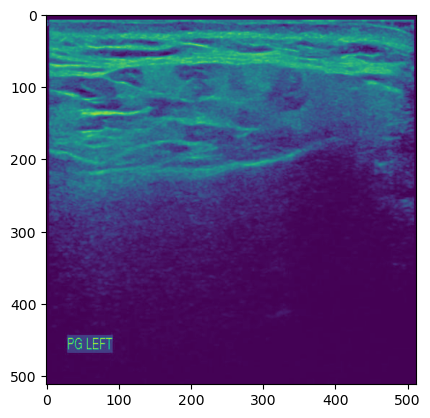

In [15]:
plt.imshow(im / 2 + 0.5)

In [16]:
image = np.expand_dims(im, axis=0)

In [90]:
image.shape

(1, 512, 512)

In [17]:
preds =model.predict(image)

1/1 [==============================] - 0s 210ms/step


In [18]:
preds

array([[1.]], dtype=float32)

In [19]:
image.shape

(1, 512, 512)

In [20]:
# Define the function that predicts the class probabilities given an image
def predict_fn(x):
    # Implement your own image classification model prediction here
    # Replace this placeholder code with your actual model prediction code
    preds = model.predict(x)
    return preds

In [21]:
from skimage.segmentation import quickshift,mark_boundaries
from skimage.color import gray2rgb
import skimage.io

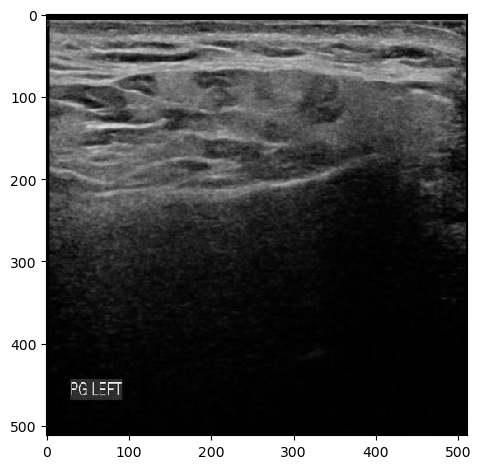

In [43]:
Xi = skimage.transform.resize(img2, (512,512)) # resizing image
skimage.io.imshow(Xi)# Show image 
Xi = (Xi - 0.5)*2

In [44]:
superpixels = quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2) #the higher the kernel size,max_dist, the fewer are the clusters

In [45]:
#Segments image using quickshift clustering
num_superpixels = np.unique(superpixels).shape[0]
print("The number of super pixels generated")
num_superpixels

The number of super pixels generated


215

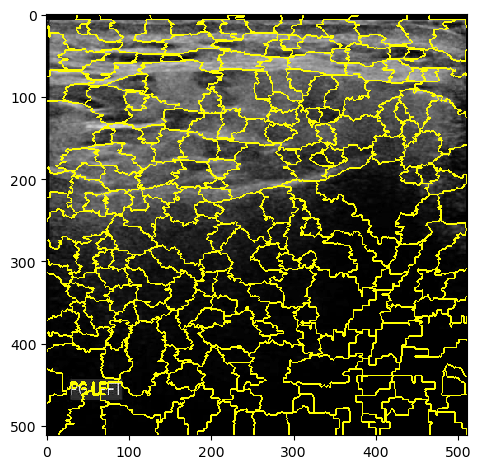

In [46]:
skimage.io.imshow(mark_boundaries(Xi/2+0.5, superpixels))

In [47]:
np.random.seed(120)
num_perturb = 100
#150 perturbations
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))# The size corresponds to the (no. of perturbations x no. of superpixels) in the image.
print(" Here, '1' represent ON(active) superpixel and '0' represents OFF.")
perturbations[0]

 Here, '1' represent ON(active) superpixel and '0' represents OFF.


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [48]:


import copy



In [49]:
def perturb_image(img,perturbation,segments): #takes in the parameters : raw image, perturbation vector and superpixels generated
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image #returns the perturbed image



The perturbed image


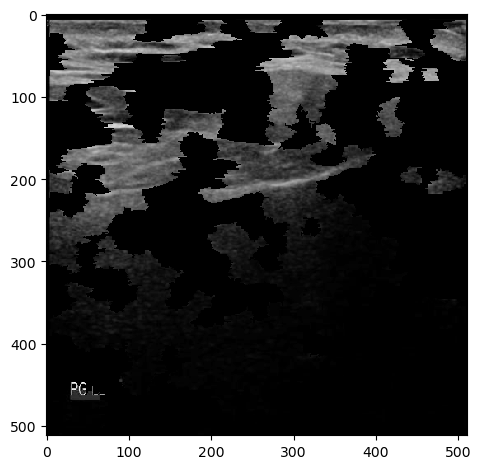

In [50]:
print("The perturbed image")
skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[0],superpixels)) 

In [54]:
inceptionV3_model = keras.applications.inception_v3.InceptionV3() #Load pretrained model

96112376/96112376 [==============================] - 0s 0us/step


In [59]:
inceptionV3_model

In [64]:
from skimage.color import rgb2gray

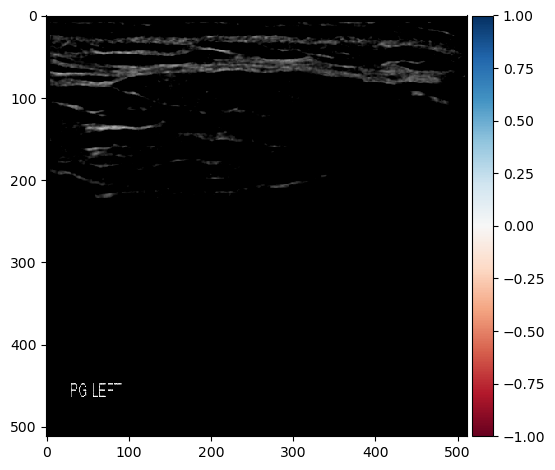

In [160]:
skimage.io.imshow(Xi)

In [85]:
gray_image.shape

(512, 512, 1)

In [86]:
gray_image.dtype

dtype('float32')

In [89]:
pred = model.predict(image)

1/1 [==============================] - 0s 104ms/step


In [110]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  # Assuming your image is stored in a variable called 'image'
  gray_image = rgb2gray(perturbed_img)
  gray_image = gray_image.astype(np.float32)
  gray_image = np.expand_dims(im, axis=0)
  print(gray_image.shape)
  pred = model.predict(gray_image)
  predictions.append(pred)


(1, 512, 512)
1/1 [==============================] - 0s 18ms/step
(1, 512, 512)
1/1 [==============================] - 0s 19ms/step
(1, 512, 512)
1/1 [==============================] - 0s 17ms/step
(1, 512, 512)
1/1 [==============================] - 0s 18ms/step
(1, 512, 512)
1/1 [==============================] - 0s 19ms/step
(1, 512, 512)
1/1 [==============================] - 0s 19ms/step
(1, 512, 512)
1/1 [==============================] - 0s 18ms/step
(1, 512, 512)
1/1 [==============================] - 0s 19ms/step
(1, 512, 512)
1/1 [==============================] - 0s 19ms/step
(1, 512, 512)
1/1 [==============================] - 0s 18ms/step
(1, 512, 512)
1/1 [==============================] - 0s 18ms/step
(1, 512, 512)
1/1 [==============================] - 0s 18ms/step
(1, 512, 512)
1/1 [==============================] - 0s 17ms/step
(1, 512, 512)
1/1 [==============================] - 0s 17ms/step
(1, 512, 512)
1/1 [==============================] - 0s 18ms/step
(1, 512, 5

In [111]:
import sklearn.metrics

In [112]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
#The distance between each randomly generated perturnation and the image being explained is computed using the cosine distance. 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()#ravel() function is used to create a contiguous flattened array.
#distances

In [113]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(100,)

In [114]:
from sklearn.linear_model import LinearRegression

In [118]:
predictions = np.array(predictions)

In [121]:
predictions.shape[0]

100

In [150]:
top_pred_classes=(0,1)

In [155]:
predictions.shape

(100, 1, 1)

In [156]:
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,top_pred_classes[0]], sample_weight=weights) # the top predicted class is to be explained
coeff = simpler_model.coef_[0] 
coeff.shape # Each coefficient in the linear model corresponds to one superpixel in the segmented image.

(215,)

In [170]:
num_top_features = 100
top_features = np.argsort(coeff)[-num_top_features:] 
#Now we need to sort the coefficients to figure out which are the superpixels that have larger coefficients (magnitude) for the prediction of egyptian cat. 
top_features

array([ 34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  27,  51,  26,  24,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  25, 106,  52,  54,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104,  81,  53,  80,  78,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  79, 214])

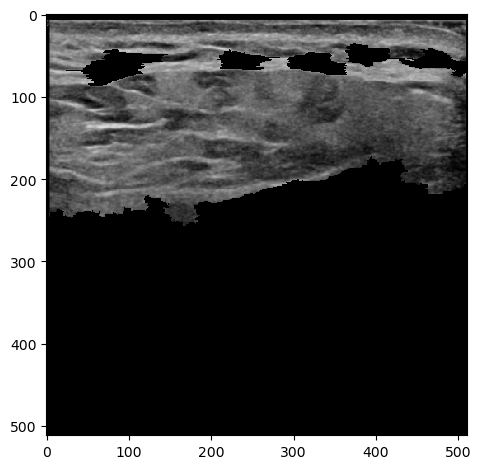

In [171]:
mask = np.zeros(num_superpixels) #The less relevant pixels are black and only the top superpixels are activated.
mask[top_features]= True 
skimage.io.imshow(perturb_image(Xi/2+0.5,mask,superpixels) )

In [79]:
%%time
# Create the Lime explanation for the image
explanation = explainer.explain_instance(image, predict_fn, labels=(0,))


ValueError: the input array must have size 3 along `channel_axis`, got (1, 512, 512)

In [ ]:

# Get the top explanations
top_explanations = explanation.top_labels[0]